NOTE: DEZE CODE IS NOG NIET VOLLEDIG. We willen twee hoeken ($\theta$ en $\varphi$) meten met behulp van een tweetal microfoons op dezelfde rij ($\theta$) een een tweetal op dezelfde kolom ($\varphi$), terwijl deze code je maar één hoek geeft op basis van één paar. De code voor beide hoeken is identiek, maar er moeten nog kleine aanpassingen worden gemaakt in het tweede deel van de code.

TOEGEVOEGDE NOTE: Vermoedelijk zit er een fout in dtime bepalen. Verder doet de code wat hij moet doen (behalve dat de waarde niet in het domein van arccos zit, maar dat komt door de fout in dtime). Check github onzecode/toevoeging.jpg voor extra informatie.

De code bestaat uit twee delen. Het eerste deel doet de meting en alle setup. Het tweede deel berekend de hoeken. Onderscheid tussen de delen is gemaakt zodat we niet een aparte meting hoeven te doen per hoek. We hebben op deze manier genoeg aan één meting.

DEEL 1: Run onderstaande code om een meting te doen. Pas de geluidssnelheid (v) en de afstanden tussen de microfoons (d) onderin dit code-blok aan zoals gewenst. 

AANPASSINGEN:

Al deze aanpassingen waren onnodig maar toch. Het zijn wat dingen om te proberen het op te lossen, maar het heeft allemaal niet gewerkt.

Andere dingen die misschien nog zouden kunnen werken zijn:
-met de scipy libary de indexes vinden van de toppen en dan daarmee kutten
-miss de gemiddelde dtime nemen van de drie paren kolomen
-meten in stille ruimte
-lagere meet frequentie zodat er minder schommelingen in zitten 



In [72]:
%pip install -q sounddevice

Note: you may need to restart the kernel to use updated packages.


Hieronder zijn de # omdat ik thuis niet moest opnemen.

In [73]:
#>>>>FINDING AUDIO DEVICE
#import sounddevice as sd

#indev = sd.query_devices("UMA16v2")
#print(f"Found input device {indev}")

#>>>>>SETTINGS
freq = 44000 #frequency
nchan = 16 #number of channels
#sd.default.samplerate = freq
#sd.default.channels = nchan
#sd.default.device = 1 #this can be different. print sd.query_devices() to check.

#>>>>>RECORD
import numpy as np

npt = 220000 #total number of measurements per channel (TIME * FREQ)
dur = npt/freq

#print(">>> Start recording for %5.2fs (%d samples per channel)" % (dur,npt))
#rec = sd.rec(npt)
#sd.wait()
#untransposed = np.array(rec)
#arec = np.transpose(untransposed) #<<-- THIS IS OUR DATA
#np.save( 'data_voorthuis',arec)
#print(">>> Done (%s x %s samples)" % (str(np.shape(arec)[0]), str(np.shape(arec)[1])))

arec = np.load('data_voorthuis.npy') #-----------Hier wordt de opgeslagen dataset opgeroepen

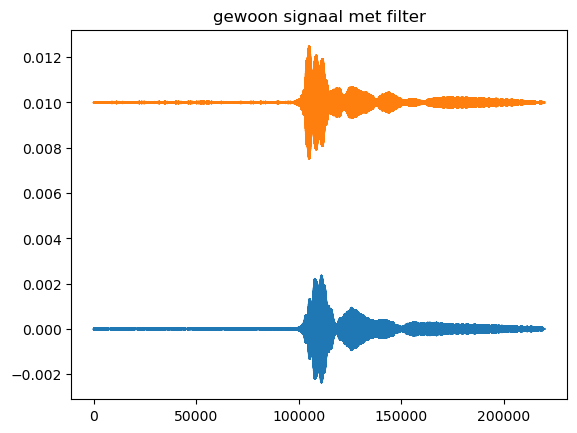

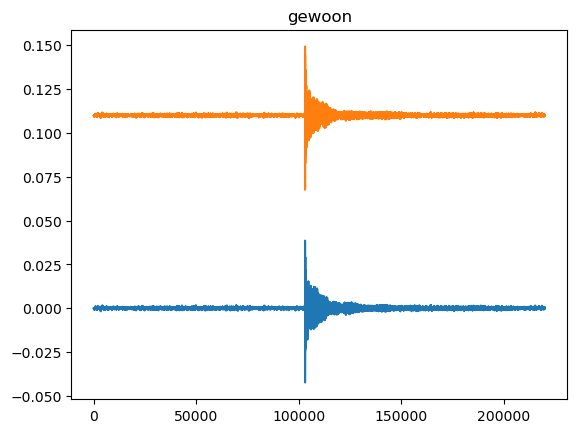

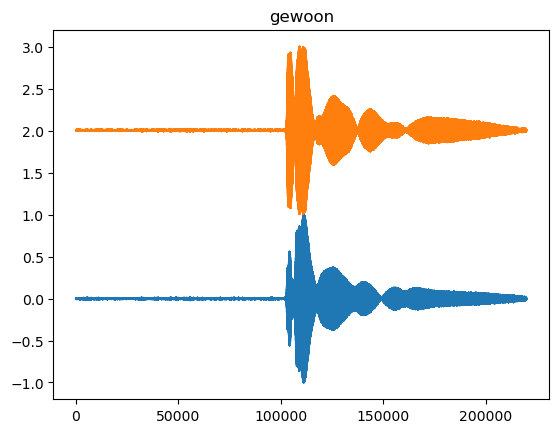

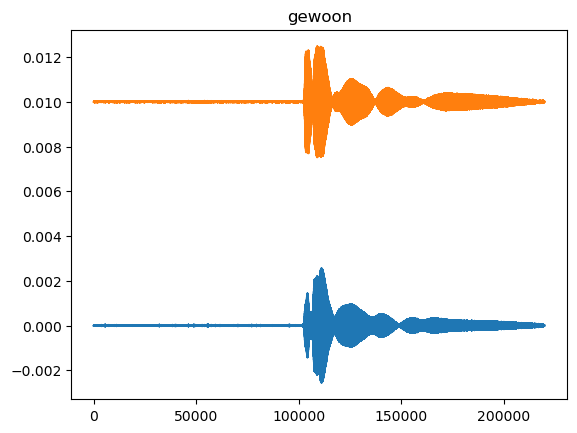

In [74]:
#>>>>FINDING AUDIO DEVICE
#import sounddevice as sd

#indev = sd.query_devices("UMA16v2")
#print(f"Found input device {indev}")

#>>>>>SETTINGS
#freq = 44000 #frequency
#nchan = 16 #number of channels
#sd.default.samplerate = freq
#sd.default.channels = nchan
#sd.default.device = 1 #this can be different. print sd.query_devices() to check.

#>>>>>RECORD
#import numpy as np

#npt = 220000 #total number of measurements per channel (TIME * FREQ)
#dur = npt/freq

#print(">>> Start recording for %5.2fs (%d samples per channel)" % (dur,npt))
#rec = sd.rec(npt)
#sd.wait()
#untransposed = np.array(rec)
#arec = np.transpose(untransposed) #<<-- THIS IS OUR DATA
#print(">>> Done (%s x %s samples)" % (str(np.shape(arec)[0]), str(np.shape(arec)[1])))

import matplotlib.pyplot as plt


#APPLYING FILTER
import scipy.signal as sps

def BandpassFilter(samples, freq, center_freq, width, order=5):
    nyquist = freq / 2
    low  = (center_freq - width/2) / nyquist
    high = (center_freq + width/2) / nyquist
    b, a = sps.butter(order, [low, high], btype='band')
    return sps.filtfilt(b, a, samples)

def Normalize(samples):#---------------<<<om te normalizeren ik denk niet dat het van enige invloed is.
    return samples / np.max(samples)

outsmp = np.zeros((16, npt))
for i in range(0, 16):
    outsmp[i, :] = BandpassFilter(arec[i, :], freq, 1911, 50) #outsmp is the filtered data!

plt.figure('3')
plt.plot(outsmp[4,:])
plt.plot(outsmp[11,:]+0.01)
plt.title('gewoon signaal met filter')
plt.show()

#Hier worden de signalen van een kolom van 4 mics bij elkaar gedaan
signal1 = (arec[6, :]  + arec[4, :] + arec[2, :] + arec[0, :])/4
signal2 =  (arec[9, :] + arec[11, :] + arec[13, :] + arec[15, :])/4

plt.figure('4')
plt.plot(signal1)
plt.plot(signal2+0.11)
plt.title('gewoon')
plt.show()

# som genormaliseerd met filter
signal1fn = Normalize(BandpassFilter(signal1,  freq, 1911,100))
signal2fn = Normalize(BandpassFilter(signal2,  freq,1911, 100))


plt.figure('5')
plt.plot(signal1fn)
plt.plot(signal2fn+2.01)
plt.title('gewoon')
plt.show()

# som met filter
signal1f = BandpassFilter(signal1,  freq, 1911,100)
signal2f = BandpassFilter(signal2,  freq,1911, 100)

plt.figure('5')
plt.plot(signal1f)
plt.plot(signal2f+.01)
plt.title('gewoon')
plt.show()

#CALCULATING THE TIME DIFFERENCE
#gewoon de oude
def time_difference(mic1index, mic2index, arec, freq): #<<-- use 1-index
    #difference in datapoints
    
    maxmic1 = max(arec[mic1index - 1])
    dp1 = np.where(arec[mic1index - 1] == maxmic1)[0][0]
    maxmic2 = max(arec[mic2index - 1])
    dp2 = np.where(arec[mic2index - 1] == maxmic2)[0][0]
    dpd = dp1 - dp2 #<<-- NOTE1 THE SIGNIFICANE OF THE SIGN!

    plt.figure('1')
    plt.plot(arec[4,:])
    plt.xlim(dp2-5000,dp1+5000)
    #plt.plot(arec[4,(dp1-50):(dp1+50)])
    plt.plot(dp1,arec[4,dp1], 'ro')
    plt.plot(arec[11,:]+0.01)
    plt.plot(dp2,arec[11,dp2] +0.01,'bo')
    plt.title('gewoon')
    plt.show()
    
    #plt.figure('2')
    #plt.plot(arec[4,:])
    #plt.xlim(dp1-1000,dp2+1000)
    #plt.plot(dp1,arec[4,dp1], 'ro')
    #plt.plot(arec[11,:]+0.01)
    #plt.plot(dp2,arec[11,dp2] +0.01,'bo')
    #plt.show()

    plt.figure('3')
    plt.plot(arec[4,:])
    plt.plot(arec[11,:]+0.01)
    plt.plot(dp1,arec[4,dp1], 'ro')
    plt.plot(dp2,arec[11,dp2] +0.01,'bo')
    plt.title('gewoon')
    plt.show()
    #time difference
    dtime = dpd/freq
    #print(arec[4,(dp1-50):(dp1+50)])
    return dtime

#Hier wordt binnen de functie de som al gedaan
def time_difference_som(mic1index, mic2index, arec, freq):
    signal1 = (arec[6, :]  + arec[4, :] + arec[2, :] + arec[0, :])/4 #de gedeelt door 4 is volgens mij niet perse nodig, maar het werkt toch niet
    signal2 =  (arec[9, :] + arec[11, :] + arec[13, :] + arec[15, :])/4


        
    maxmic1 = max(signal1)
    dp1 = np.where(signal1 == maxmic1)[0][0]
    maxmic2 = max(signal2[dp1-500:dp1+500]) # Hier wordt er alleen gekeken naar maxima in de buurt van dp1
    dp2 = np.where(signal2 == maxmic2)[0][0]
    #print(dp1)
    dpd = dp1 - dp2 #<<-- NOTE1 THE SIGNIFICANE OF THE SIGN!
    print(dp1,dp2,dpd)

    plt.figure('1')
    plt.plot(signal1)
    plt.xlim(dp2-500,dp1+500)
    #plt.plot(arec[4,(dp1-50):(dp1+50)])
    plt.plot(dp1,signal1[dp1], 'ro')
    plt.plot(signal2+0.01)
    plt.plot(dp2,signal2[dp2]+0.01,'bo')
    plt.title('plus')
    plt.show()

    plt.figure('3')
    plt.plot(signal1)
    plt.plot(signal2 + 0.01)
    plt.plot(dp1,signal1[dp1], 'ro')
    plt.plot(dp2,signal2[dp2] +0.01,'bo')
    plt.title('plus')
    plt.show()
    

    return dpd/freq

#Deze gebruikt al de al gesommeerde lijsten
def time_difference_som_voor_filter(signal1,signal2, freq):
    #hier komen twee normale lijsten binnen waarmee dezelfde berekening wordt gedaan
    #        
    maxmic1 = max(signal1)
    dp1 = np.where(signal1 == maxmic1)[0][0]
    maxmic2 = max(signal2[dp1-500:dp1+500]) # Die +- 500 had als domijn zodat hij alleen gaat kijken voor maxima in de buurt.
    dp2 = np.where(signal2 == maxmic2)[0][0]
    #print(dp1)
    dpd = dp1 - dp2 #<<-- NOTE1 THE SIGNIFICANE OF THE SIGN!
    #print(dp1,dp2,dpd)


    #alle plotjes zijn voor probleem bekijken

    plt.figure('1')
    plt.plot(signal1)
    plt.xlim(dp2-500,dp1+500)
    #plt.plot(arec[4,(dp1-50):(dp1+50)])
    plt.plot(dp1,signal1[dp1], 'ro')
    plt.plot(signal2+0.01)
    plt.plot(dp2,signal2[dp2]+0.01,'bo')
    plt.title('plus')
    plt.show()

    plt.figure('3')
    plt.plot(signal1)
    plt.plot(signal2 + 0.01)
    plt.plot(dp1,signal1[dp1], 'ro')
    plt.plot(dp2,signal2[dp2] +0.01,'bo')
    plt.title('plus')
    plt.show()
    

    return dpd/freq


    
#CALCULATING THE ANGLE
import math 



def angle(mic1index, mic2index, arec, freq):
    v = 342.55 #speed of sound (m/s)
    d = 0.042 #distance between mics (m)
    print(f"de het tijdverschil is{time_difference(mic1index, mic2index, arec, freq)}")
    print(f"het argument van de arccos is{(v * time_difference(mic1index, mic2index, arec, freq))/d}")
    theta = math.acos((v * time_difference(mic1index, mic2index, arec, freq))/d)
    
    return theta

def angle2(signal1,signal2, freq):
    v = 342.55 #speed of sound (m/s)
    d = 0.042 #distance between mics (m)
    print(f"de het tijdverschil is{time_difference_som_voor_filter(signal1,signal2, freq)}")
    print(f"het argument van de arccos is{(v * time_difference_som_voor_filter(signal1,signal2, freq))/d}")
    theta = math.acos((v * time_difference_som_voor_filter(signal1,signal2, freq))/d)
    
    return theta

DEEL 2: Pas "EERSTE_MIC" en "TWEEDE_MIC" aan. Merk op dat de volgorde uitmaakt voor de interpretatie van de hoek. Lees hiervoor de comment onderin de code.

HORIZONTAAL: Kies voor "EERSTE_MIC_h" en "TWEEDE_MIC_h" twee microfoons die in dezelfde rij liggen.

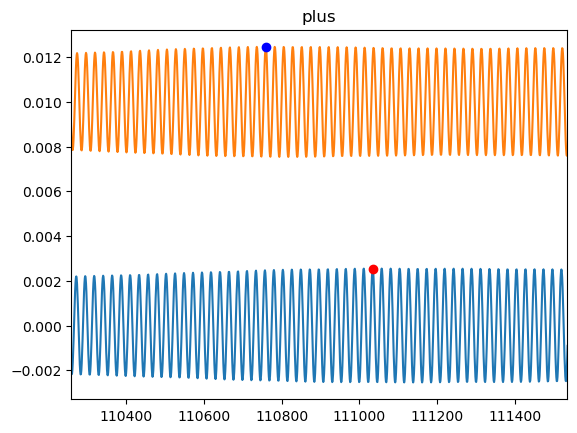

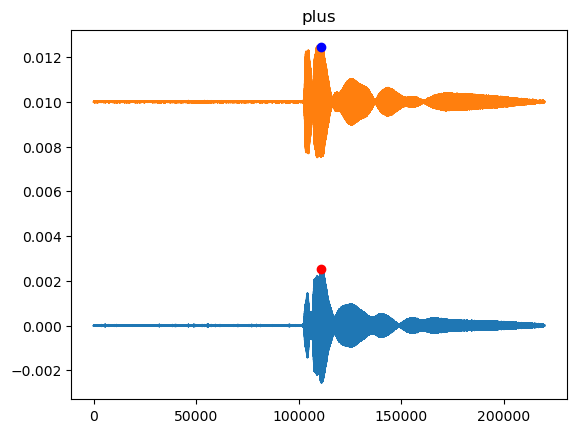

de het tijdverschil is0.00625


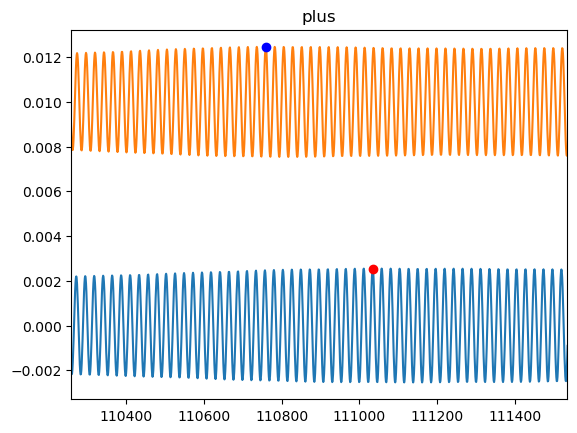

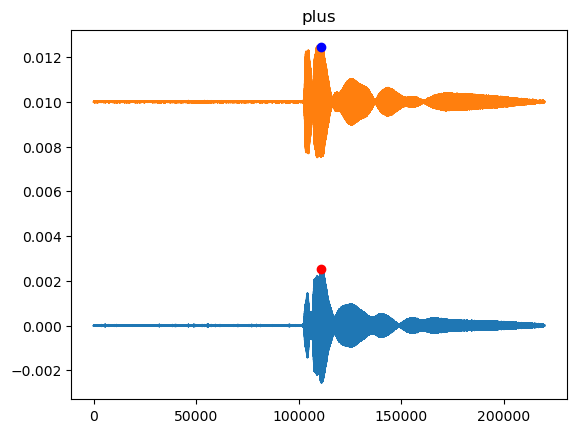

het argument van de arccos is50.97470238095238


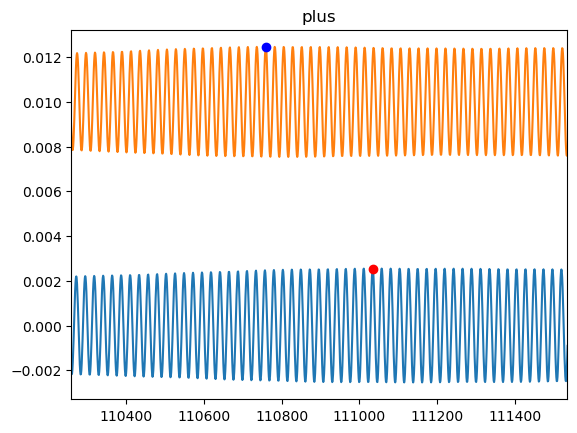

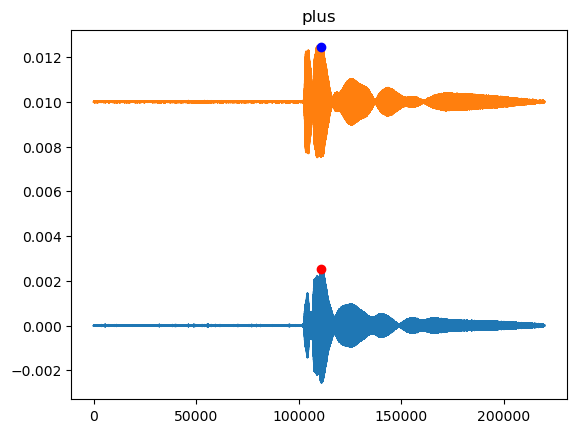

ValueError: math domain error

In [75]:
EERSTE_MIC_h = 5 #in 1-index
TWEEDE_MIC_h = 12 #in 1-index



#Deze voor als je de al gecombineerde signalen gebruikt
print("Deze hoek is ", angle2(signal1f,signal2f, freq), " radialen.") 

#Deze voor als je de oude methode doet
#print("Deze hoek is ", angle(EERSTE_MIC_h, TWEEDE_MIC_h, outsmp, freq), " radialen.")

#>>>>>>NOTEEEEEE: An angle theta should be interpreted as follows:
#Draw a line between "EERSTE_MIC" and "TWEEDE_MIC". Rotate that line with *output* radians over "EERSTE_MIC". The line will point towards the source.


VERTICAAL: Kies voor "EERSTE_MIC_v" en "TWEEDE_MIC_v" twee microfoons die in dezelfde kolom liggen.

In [ ]:
EERSTE_MIC_v = 5 #in 1-index
TWEEDE_MIC_v = 7 #in 1-index

print("Deze hoek is ", angle(EERSTE_MIC_h, TWEEDE_MIC_h, outsmp, freq), " radialen.")

#>>>>>>NOTEEEEEE: An angle theta should be interpreted as follows:
#Draw a line between "EERSTE_MIC" and "TWEEDE_MIC". Rotate that line with *output* radians over "EERSTE_MIC". The line will point towards the source.